In [112]:
import pandas as pd
import matplotlib.pyplot as plt


In [113]:
df = pd.read_excel("Bank Data for case study assignment.xlsx", header=0)
df.shape

(1021, 8)

In [114]:
description = df.describe(include = 'all')
description

,age,job,marital status,education,credit default?,housing loan?,Personal loan,y
count,1021.000000,1019,1020,1020,1020,1019,1019,1021
unique,NaN,12,3,4,2,3,2,2
top,NaN,blue-collar,married,secondary,no,yes,no,no
freq,NaN,217,617,524,998,583,869,897
mean,41.066601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,10.400013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
df.dropna(inplace=True)
df.shape

(1013, 8)

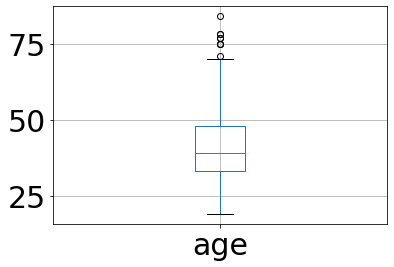

In [116]:
df.boxplot(column='age', fontsize=30)

In [117]:
df.columns

Index(['age', 'job', 'marital status ', 'education', 'credit default?',
       'housing loan?', 'Personal loan', 'y'],
      dtype='object')

In [118]:
desc = df["marital status "].describe()
print(desc)
df["marital status "].unique()

count        1013
unique          3
top       married
freq          612
Name: marital status , dtype: object


array(['married', 'single', 'divorced'], dtype=object)

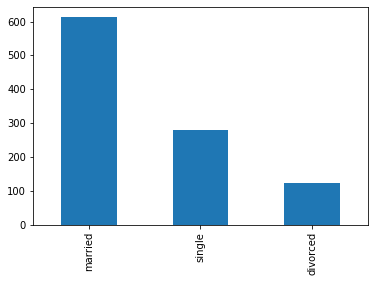

In [119]:
#df.plot(y='marital status ', kind='hist')
fig, ax = plt.subplots()
df['marital status '].value_counts().plot(ax=ax, kind='bar')

In [120]:
desc = df["job"].describe()
print(desc)
df["job"].unique()

count            1013
unique             12
top       blue-collar
freq              217
Name: job, dtype: object


array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

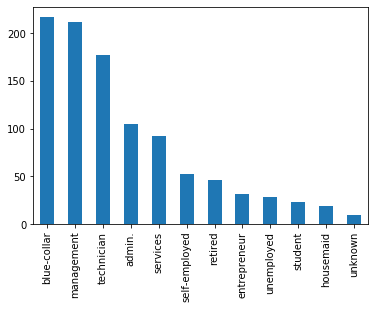

In [121]:
fig, ax = plt.subplots()
df['job'].value_counts().plot(ax=ax, kind='bar')

In [122]:
desc = df["education"].describe()
print(desc)
df["education"].unique()

count          1013
unique            4
top       secondary
freq            520
Name: education, dtype: object


array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

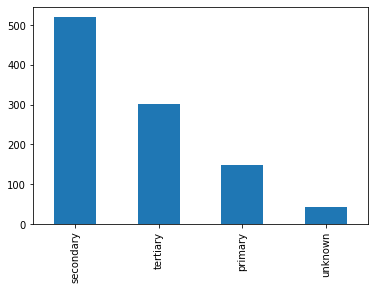

In [123]:
fig, ax = plt.subplots()
df['education'].value_counts().plot(ax=ax, kind='bar')

In [124]:
desc = df["credit default?"].describe()
print(desc)
df["credit default?"].unique()

count     1013
unique       2
top         no
freq       991
Name: credit default?, dtype: object


array(['no', 'yes'], dtype=object)

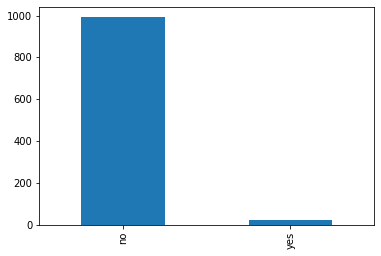

In [125]:
fig, ax = plt.subplots()
df['credit default?'].value_counts().plot(ax=ax, kind='bar')

In [126]:
desc = df["housing loan?"].describe()
print(desc)
df["housing loan?"].unique()

count     1013
unique       3
top        yes
freq       580
Name: housing loan?, dtype: object


array(['no', 'yes', 'xxxyy'], dtype=object)

yes      580
no       432
xxxyy      1
Name: housing loan?, dtype: int64


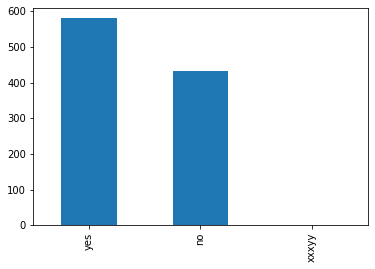

In [127]:
print(df['housing loan?'].value_counts())
fig, ax = plt.subplots()
df['housing loan?'].value_counts().plot(ax=ax, kind='bar')

In [128]:
df = df[df['housing loan?'] != 'xxxyy']
df['housing loan?'].value_counts()

yes    580
no     432
Name: housing loan?, dtype: int64

In [129]:
desc = df["Personal loan"].describe()
print(desc)
df["Personal loan"].unique()

count     1012
unique       2
top         no
freq       863
Name: Personal loan, dtype: object


array(['no', 'yes'], dtype=object)

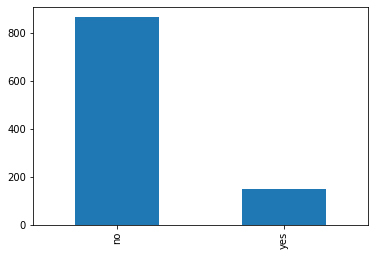

In [130]:
fig, ax = plt.subplots()
df['Personal loan'].value_counts().plot(ax=ax, kind='bar')

In [131]:
desc = df["y"].describe()
print(desc)
df["y"].unique()

count     1012
unique       2
top         no
freq       890
Name: y, dtype: object


array(['no', 'yes'], dtype=object)

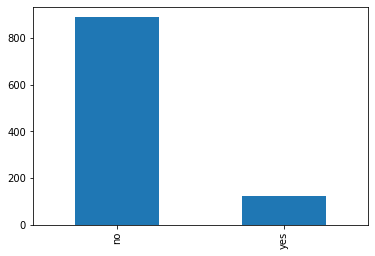

In [132]:
fig, ax = plt.subplots()
df['y'].value_counts().plot(ax=ax, kind='bar')